# Example 3: Rutherford Scattering

With this example we want to illustrate Rutherford experiment, i.e. the scattering of charged particles at Coulomb potential. We consider the original setup of scattering Helium nuclei off a gold target. The corresponding repulsive potential reads $$V_{\rm RF}(r)=\frac{\alpha}{r}\,,\quad \text{with}\quad \alpha=\frac{Z_{\rm He}Z_{\rm Au}e^2}{4\pi\epsilon_0}\,,$$

with $Z_{\rm He}=2$ and $Z_{\rm Au}=79$ the respective charge numbers, $e$ the elementary charge and $\epsilon_0$ the electric field constant. In the lecture we have derived the relation between the impact parameter $b$ and the scattering angle $\theta$, under which the projectiles get observed in a detector, i.e. $$b=\left(\frac{\alpha}{2E}\right)\cot\left(\frac{\theta}{2}\right)=\left(\frac{\alpha}{2E}\right)\tan^{-1}\left(\frac{\theta}{2}\right)\,,$$ with $E$ the kinetic energy of the Helium nuclei. Furthermore, we derived the dependence of the differential scattering cross section on the angle $\theta$: $$\frac{d\sigma_{\rm RF}}{d\Omega}=\left(\frac{\alpha}{4E}\right)^2\frac{1}{\sin^4\left(\frac{\theta}{2}\right)}\,.$$ For the initial energy of the $\alpha$-particles we assume $3.6$ MeV.


To gain some first insight into the relation between the scattering angle and the impact parameter, we generate values for $\theta$ at random, following the distribution 

$$P(\theta>\theta_{\rm min})\propto\frac{1}{\sin^4\left(\frac{\theta}{2}\right)}$$ 

This is based on a simple hit-or-miss Monte Carlo method, that is implemented in the function `genTheta` below. The resulting distribution can be seen in Fig. 2. In Fig. 3 we present the distribution of the corresponding impact parameters, note the microscopic scale!


In [64]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import random as ran

## physical input parameters
e = 1.602e-19
epsilon0 = 8.854e-12
Z1 =  2 # charge number He
Z2 = 79 # charge number Au
alpha = Z1*Z2*e*e/(4*np.pi*epsilon0)

## energy of the incoming He nuclei (3.6 MeV)
E = 3.6e6*e 

## generate theta according to 1/sin^4(theta/2)
def genTheta(xmiss,ymiss,xhit,yhit):
    hit=False
    theta=0
    thetamin=0.1
    max=1./pow(np.sin(thetamin/2.),4)
    while hit==False:
        theta=(np.pi-thetamin)*ran.random()+thetamin        
        ftheta=(max*(np.pi-theta+0.05))*ran.random()
        func=pow(np.sin(theta/2.),-4)
        if ftheta<func:
            hit=True
            xhit.append(theta)
            yhit.append(ftheta)
            return theta
        else:
            xmiss.append(theta)
            ymiss.append(ftheta)
            

## calculate impact parameter from theta
def calcb(theta):
    b=(alpha/(2.*E))*1./np.tan(theta/2.)
    return b

## calculate theta from impact parameter
def calcTheta( b ):
    arg = (2.*E*b)/alpha
    theta = 2.*np.arctan(1./arg)
    return theta

# Monte Carlo Hit-or-Miss generation of $\theta$ values

<IPython.core.display.Javascript object>


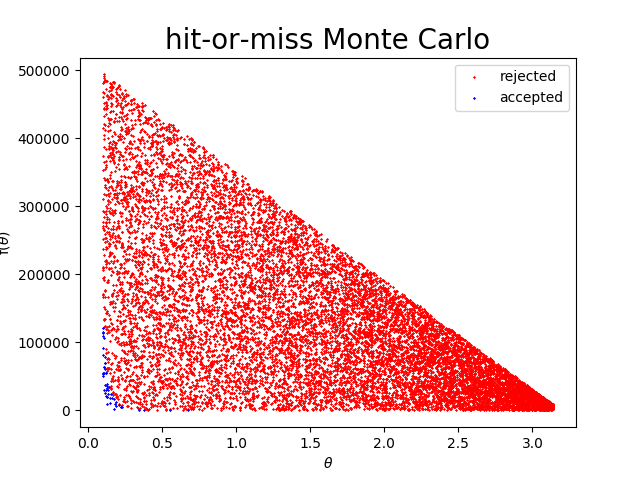

<function matplotlib.pyplot.show(*args, **kw)>

In [65]:
xmiss = []
ymiss = []
xhit = []
yhit = []

for i in range(0,50):
    theta=genTheta(xmiss,ymiss,xhit,yhit)
  
# scatter plot of accepted and rejected points
fig = plt.figure(1)
plt.scatter(xmiss, ymiss, marker='x',s=0.5,c='r',label='rejected')
plt.scatter(xhit, yhit, marker='x',s=0.5,c='b',label='accepted')

plt.legend()
plt.title('hit-or-miss Monte Carlo', fontsize=20)
plt.xlabel('$\\theta$')
plt.ylabel('f($\\theta$)')

plt.show

# event loop: generate $\theta$ and calculate $b$ and plot results

<IPython.core.display.Javascript object>


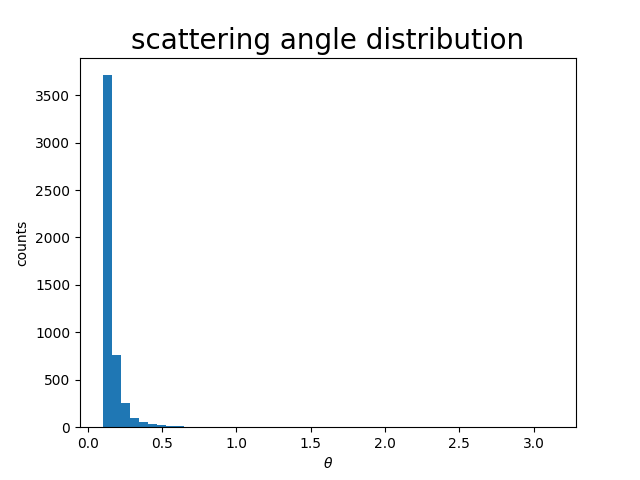

<IPython.core.display.Javascript object>


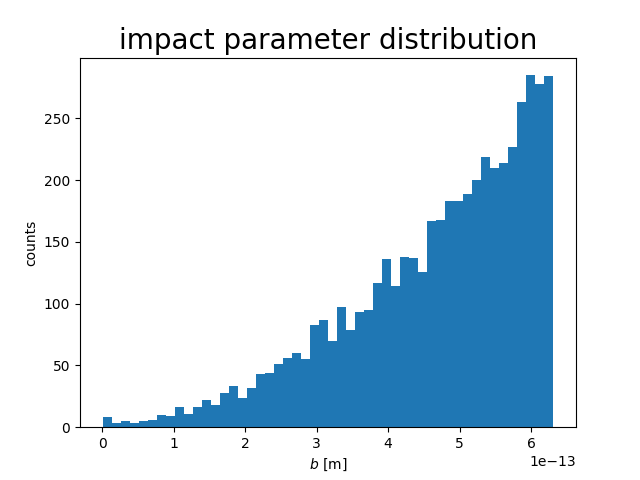

In [69]:

ThetaVals = []
bVals = []

# number of scattering events
noEvents = 5000

# generate angle theta and calculate b 
for i in range(0,noEvents):
    theta=genTheta(xmiss,ymiss,xhit,yhit)
    b=calcb(theta)
    ThetaVals.append(theta)
    bVals.append(b)
  

# generate and plot histograms of theta and b values

NBins = 50
fig = plt.figure(2)

# theta distribution
n,bins,patches = plt.hist(ThetaVals,NBins,density=False, histtype='stepfilled')
plt.title("scattering angle distribution", fontsize=20)
plt.xlabel('$\\theta$')
plt.ylabel('counts')

fig = plt.figure(3)

# impact parameter distribution
n,bins,patches = plt.hist(bVals,NBins,density=False, histtype='stepfilled')
plt.title("impact parameter distribution", fontsize=20)
plt.xlabel('$b$ [m]')
plt.ylabel('counts')

plt.show()

# illustration of selected particle trajectories

As another illustration we want to consider the explicte trajectories for a set of scattering angles. For the repulsive
Coulomb interaction the trajectory in polar coordinates is given by $$r(\varphi)=\frac{p}{e\cos\varphi-1}\,,$$ this is implemented in function `Trajectory` below. Note, in order to have for the various scattering angles considered all incoming particles approach from $x\to -\infty$, we rotate the coordinate system accordingly. To specify the trajectory we have to use the corresponding relations of the parameters $p$ and $e$ to the scattering angle $\theta$, i.e. the impact parameter $b=b(\theta):

$$p=\frac{2b^2E}{\alpha}\,,\quad e = \sqrt{1+\left(\frac{2bE}{\alpha}\right)^2}\,.$$


<IPython.core.display.Javascript object>


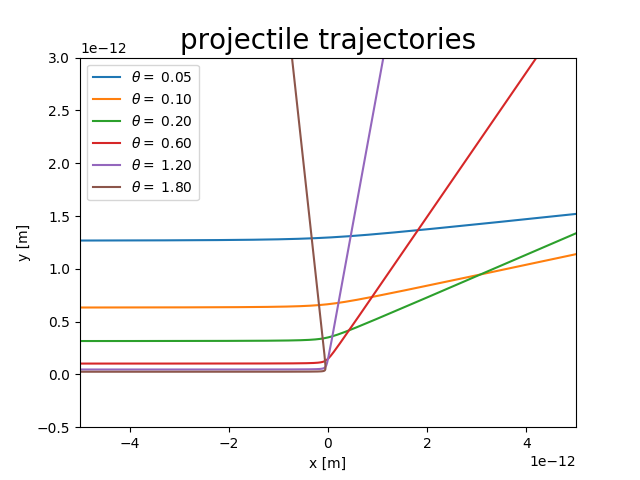

In [72]:
# polar coordinate presentation of the hyperbola for the repulsive case
def Trajectory(phi,theta,p,e):
    r=p/(e*np.cos(phi)-1)
    x=np.cos(phi+np.pi)*r
    y=np.sin(phi+np.pi)*r
    # rotate to new x' axis
    angle = (theta-np.pi)/2.
    xp=x*np.cos(angle)-y*np.sin(angle)
    yp=x*np.sin(angle)+y*np.cos(angle)
    return xp,yp 

# routine to plot an individual trajectory
def plotTrajectory(theta):
    b=calcb(theta)
    e=np.sqrt(1+(4.*b*b*E*E)/alpha**2)
    p=2.*b*b*E/alpha
    dphi = (np.pi-theta)/2
    plt.plot(*Trajectory(np.linspace(-0.999*dphi,0.999*dphi, 10000),theta=theta,p=p,e=e),label='$\\theta=$ %.2f' %theta)
    return True;

fig = plt.figure(4)

# loop of set of scattering angles
for val in [0.05,0.1,0.2,0.6,1.2,1.8]:
    plotTrajectory(val)

plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.xlim(-5.*10**-12, 5.*10**-12)
plt.ylim(-5*10**-13, 3.*10**-12)
plt.title("projectile trajectories", fontsize=20)
plt.legend()
plt.show()
